<h1><center> Assignment 2 - Machine Learning with Spark </center></h1>
<h2><center> Chrislin Priscilla </center></h2>


<h3> Part 1: </h3> Reading comma separated file and loading in to spark dataframe 
    
    

In [41]:
from pyspark import SparkContext
from pyspark.ml.linalg import DenseVector
from pyspark.ml.feature import StandardScaler


filename="MSD.txt"
spark = SparkSession.builder.getOrCreate()
data = spark.read.load(filename , format = 'csv',header = 'false', inferschema = 'true', sep= ",")
print("# of rows in data:",data.count())
data = data.withColumnRenamed("_c0", "target")

#Normalize features between 0 and 1
#References: https://www.datacamp.com/community/tutorials/apache-spark-tutorial-machine-learning


input_data = data.rdd.map(lambda x: (x[0], DenseVector(x[1:])))
df = spark.createDataFrame(input_data, ["target", "features"])
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")
scaler = standardScaler.fit(df)
scaled_df = scaler.transform(df)


scaled_df.take(2)



# of rows in data: 515345


[Row(target=2001, features=DenseVector([49.9436, 21.4711, 73.0775, 8.7486, -17.4063, -13.099, -25.012, -12.2326, 7.8309, -2.4678, 3.3214, -2.3152, 10.2056, 611.1091, 951.0896, 698.1143, 408.9848, 383.7091, 326.5151, 238.1133, 251.4241, 187.1735, 100.4265, 179.195, -8.4156, -317.8704, 95.8627, 48.1026, -95.663, -18.0622, 1.9698, 34.4244, 11.7267, 1.3679, 7.7944, -0.3699, -133.6785, -83.2616, -37.2976, 73.0467, -37.3668, -3.1385, -24.2153, -13.2307, 15.9381, -18.6048, 82.1548, 240.5798, -10.2941, 31.5843, -25.3819, -3.9077, 13.2926, 41.5506, -7.2627, -21.0086, 105.5085, 64.2986, 26.0848, -44.5911, -8.3066, 7.9371, -10.7366, -95.4477, -82.0331, -35.5919, 4.6952, 70.9563, 28.0914, 6.0202, -37.1377, -41.1245, -8.4082, 7.1988, -8.6018, -5.9086, -12.3244, 14.6873, -54.3212, 40.1479, 13.0162, -54.4055, 58.9937, 15.3734, 1.1114, -23.0879, 68.408, -1.8222, -27.4635, 2.2633]), features_scaled=DenseVector([8.2312, 0.4163, 2.072, 0.536, -0.7614, -1.0188, -1.7165, -1.536, 0.74, -0.3779, 0.7599, -0.2

In [42]:
scaled_df.show()

+------+--------------------+--------------------+
|target|            features|     features_scaled|
+------+--------------------+--------------------+
|  2001|[49.94357,21.4711...|[8.23124681607229...|
|  2001|[48.73215,18.4293...|[8.03159154477458...|
|  2001|[50.95714,31.8560...|[8.39829424250509...|
|  2001|[48.2475,-1.89837...|[7.95171592175825...|
|  2001|[50.9702,42.20998...|[8.40044667340696...|
|  2001|[50.54767,0.31568...|[8.33080910610460...|
|  2001|[50.57546,33.1784...|[8.33538920218141...|
|  2001|[48.26892,8.97526...|[7.95524617213483...|
|  2001|[49.75468,33.9958...|[8.20011567724725...|
|  2007|[45.17809,46.3423...|[7.44584356842587...|
|  2008|[39.13076,-23.017...|[6.44917741484017...|
|  2002|[37.66498,-34.059...|[6.20760083234792...|
|  2004|[26.51957,-148.15...|[4.37071531182305...|
|  2003|[37.68491,-26.841...|[6.21088551442099...|
|  1999|[39.11695,-8.2976...|[6.44690137573183...|
|  2003|[35.05129,-67.977...|[5.77683612148123...|
|  2002|[33.63129,-96.149...|[5

<h3> Part 2: </h3> Split dataset into training, validation and test set

In [43]:
scaled_df=scaled_df.drop('features')


In [44]:
scaled_df=scaled_df.withColumnRenamed('features_scaled', 'features')
scaled_df.show()

+------+--------------------+
|target|            features|
+------+--------------------+
|  2001|[8.23124681607229...|
|  2001|[8.03159154477458...|
|  2001|[8.39829424250509...|
|  2001|[7.95171592175825...|
|  2001|[8.40044667340696...|
|  2001|[8.33080910610460...|
|  2001|[8.33538920218141...|
|  2001|[7.95524617213483...|
|  2001|[8.20011567724725...|
|  2007|[7.44584356842587...|
|  2008|[6.44917741484017...|
|  2002|[6.20760083234792...|
|  2004|[4.37071531182305...|
|  2003|[6.21088551442099...|
|  1999|[6.44690137573183...|
|  2003|[5.77683612148123...|
|  2002|[5.54280458391148...|
|  1992|[6.82092991983204...|
|  1997|[6.17222581176765...|
|  1987|[6.54479413092219...|
+------+--------------------+
only showing top 20 rows



In [45]:
from pyspark.sql.types import DoubleType

scaled_df = scaled_df.withColumn("target", scaled_df.target.cast(DoubleType()))
print(scaled_df.show())
train_data, test_set = scaled_df.randomSplit([.8,.2],seed=1234)
train_set, validation_set = train_data.randomSplit([.9,.1],seed=1234)

+------+--------------------+
|target|            features|
+------+--------------------+
|2001.0|[8.23124681607229...|
|2001.0|[8.03159154477458...|
|2001.0|[8.39829424250509...|
|2001.0|[7.95171592175825...|
|2001.0|[8.40044667340696...|
|2001.0|[8.33080910610460...|
|2001.0|[8.33538920218141...|
|2001.0|[7.95524617213483...|
|2001.0|[8.20011567724725...|
|2007.0|[7.44584356842587...|
|2008.0|[6.44917741484017...|
|2002.0|[6.20760083234792...|
|2004.0|[4.37071531182305...|
|2003.0|[6.21088551442099...|
|1999.0|[6.44690137573183...|
|2003.0|[5.77683612148123...|
|2002.0|[5.54280458391148...|
|1992.0|[6.82092991983204...|
|1997.0|[6.17222581176765...|
|1987.0|[6.54479413092219...|
+------+--------------------+
only showing top 20 rows

None


<h3> Part 3: </h3> Fitting Linear Model on Training Data 

In [46]:
#References: https://spark.apache.org/docs/1.5.2/ml-linear-methods.html
#References: https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='target', maxIter=50, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_set)



In [47]:
from pyspark.ml.evaluation import RegressionEvaluator
lr_predictions = lr_model.transform(validation_set)
lr_predictions.select("prediction","target","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="target",metricName="rmse")
print("Root mean square error (RMSE) on validation data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+------+--------------------+
|        prediction|target|            features|
+------------------+------+--------------------+
|1994.8330931356024|1922.0|[7.20010056532111...|
|1989.8156339085174|1938.0|[5.35972929337399...|
|1986.0199576059513|1939.0|[5.63631666426479...|
|1988.7640660119512|1939.0|[6.04095060028522...|
|1989.3374780066458|1951.0|[6.66857538887413...|
+------------------+------+--------------------+
only showing top 5 rows

Root mean square error (RMSE) on validation data = 9.69632


<h3> Part 3: </h3> Visualize the log of the training error as a function of iteration

Text(0, 0.5, 'Iterations')

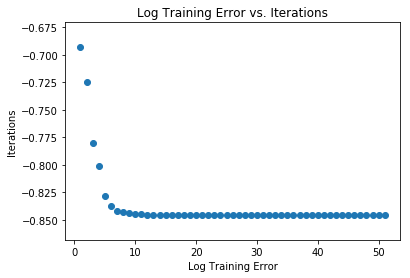

In [48]:
trainingSummary = lr_model.summary
iterations = range(1,trainingSummary.totalIterations+1)

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.scatter(iterations, np.log(trainingSummary.objectiveHistory))
plt.title('Log Training Error vs. Iterations')
plt.xlabel('Log Training Error')
plt.ylabel('Iterations')

<h3> Part 4: </h3> 
Use this model for prediction on test data

In [49]:
lr_predictions = lr_model.transform(test_set)
lr_predictions.select("prediction","target","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="target",metricName="rmse")
print("Root mean square error (RMSE) on test data = %g" % lr_evaluator.evaluate(lr_predictions))



+------------------+------+--------------------+
|        prediction|target|            features|
+------------------+------+--------------------+
|1991.8310524585897|1922.0|[6.58704341589120...|
|1996.1796059469502|1922.0|[6.75137310989124...|
| 1994.499900093061|1922.0|[6.76165566455953...|
| 1996.266250324707|1928.0|[6.11344598932100...|
|1988.5685191978248|1932.0|[5.31075242575455...|
+------------------+------+--------------------+
only showing top 5 rows

Root mean square error (RMSE) on test data = 9.71138
